<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/Clothes_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Basic libraries
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Imagen basic libraries
import cv2
from scipy import misc

# Deep learning libraries
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [ ]:
def convolution_imagen(imagen, filter, weight):
  """
  Función de convolución de una imagen
    Input:
      imagen: imagen de entrada 
      filter: kernel de la función de 
      weight: Peso del filtro
    Output:
      imagen_transformed: imagen con aplicación de convolución
  """

  size_x, size_y = imagen_transformed.shape[0], imagen_transformed.shape[1] # Dimensiones de la imagen de entrada
  imagen_transformed = np.copy(imagen)                                      # Imagen de transformación 

  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        output_pixel = 0.0
        output_pixel = output_pixel + (imagen[x - 1, y-1] * filter[0][0])
        output_pixel = output_pixel + (imagen[x, y-1] * filter[0][1])
        output_pixel = output_pixel + (imagen[x + 1, y-1] * filter[0][2])
        output_pixel = output_pixel + (imagen[x-1, y] * filter[1][0])
        output_pixel = output_pixel + (imagen[x, y] * filter[1][1])
        output_pixel = output_pixel + (imagen[x+1, y] * filter[1][2])
        output_pixel = output_pixel + (imagen[x-1, y+1] * filter[2][0])
        output_pixel = output_pixel + (imagen[x, y+1] * filter[2][1])
        output_pixel = output_pixel + (imagen[x+1, y+1] * filter[2][2])
        output_pixel = output_pixel * weight
        if(output_pixel<0):
          output_pixel=0
        if(output_pixel>255):
          output_pixel=255
        imagen_transformed[x, y] = output_pixel

  return imagen_transformed


def pooling_imagen(imagen):
  """
    Función de 
      input:
        imagen: imagen de entrada 
      output: 
        newImage: imagen de salida aplicandole el pooling
  """

  size_x, size_y = imagen.shape[0], imagen.shape[1]             # Dimensiones de la imagen de entrada 
  new_x, new_y = int(imagen.shape[0]/2), int(imagen.shape[1]/2) # Redimensionamiento de la imagen 
  newImage = np.zeros((new_x, new_y))                           # Creación de una nueva imagen  

  for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
      pixels = []
      pixels.append(imagen[x, y])
      pixels.append(imagen[x+1, y])
      pixels.append(imagen[x, y+1])
      pixels.append(imagen[x+1, y+1])
      pixels.sort(reverse=True)
      newImage[int(x/2),int(y/2)] = pixels[0]

  return newImage 


#**Convolución**

Es un que filtro procesa y extrae características importates de una imagen

ver: 
https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9


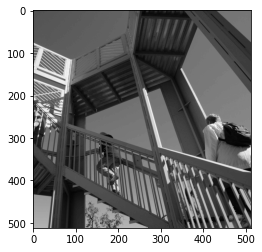

In [ ]:
imagen = misc.ascent()

plt.gray()
plt.imshow(imagen)
plt.show()

In [ ]:
weight  = 1 

filter_1 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter_2 = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter_3 = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

print(np.asarray(filter_1), "\n")
print(np.asarray(filter_2), "\n")
print(np.asarray(filter_3), "\n")


[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]] 

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]] 

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 



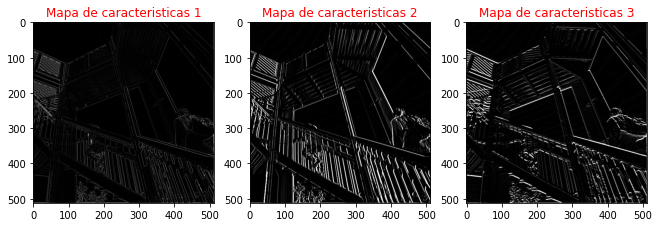

In [ ]:
imagen_transformed_1 = convolution_imagen(imagen, filter_1, weight)
imagen_transformed_2 = convolution_imagen(imagen, filter_2, weight)
imagen_transformed_3 = convolution_imagen(imagen, filter_3, weight)

plt.figure(figsize=(11,4))
plt.subplot(131)
plt.title("Mapa de caracteristicas 1", c='r')
plt.imshow(imagen_transformed_1)
plt.subplot(132)
plt.title("Mapa de caracteristicas 2", c='r')
plt.imshow(imagen_transformed_2)
plt.subplot(133)
plt.title("Mapa de caracteristicas 3", c='r')
plt.imshow(imagen_transformed_3)
plt.show() 

#**Pooling**

1. ¿qué puede hacer? 
2. ¿Cómo utiliza las características resultante para clasificar imágenes?

Agrupa los pixeles de una imagen y los filtra a su subcojunto
Reduce la imagen mantenieondo sus características 




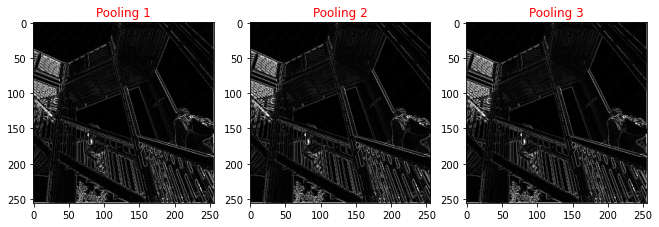

In [ ]:
image_pooling_1 = pooling_imagen(imagen_transformed_1)
image_pooling_2 = pooling_imagen(imagen_transformed_2)  
image_pooling_3 = pooling_imagen(imagen_transformed_3)  

plt.figure(figsize=(11,4))
plt.subplot(131)
plt.title("Pooling 1", c='r')
plt.imshow(image_pooling_1)
plt.subplot(132)
plt.title("Pooling 2", c='r')
plt.imshow(image_pooling_1)
plt.subplot(133)
plt.title("Pooling 3", c='r')
plt.imshow(image_pooling_1)
plt.show() 


#**Download DataSet**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-10-22 21:55:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   124MB/s    in 1.5s    

2020-10-22 21:55:38 (124 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-10-22 21:55:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/r

In [ ]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

rock_files = os.listdir(os.path.join('/tmp/rps/rock'))
paper_files = os.listdir(os.path.join('/tmp/rps/paper'))
scissors_files = os.listdir(os.path.join('/tmp/rps/scissors'))

len(rock_files), len(paper_files), len(scissors_files)


(840, 840, 840)

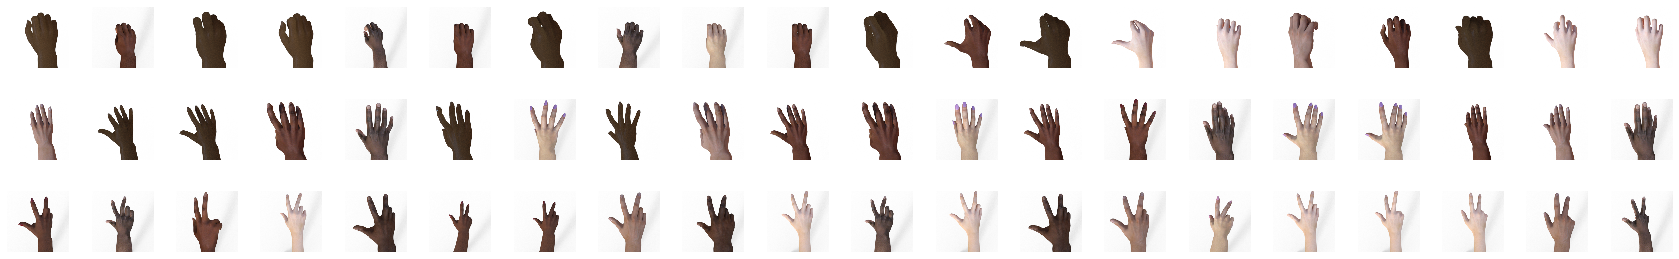

In [ ]:
n_rows = 3
n_cols = 20
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col

    if row == 0:
      img_path = '/tmp/rps/rock/' + rock_files[index]
    if row == 1:
      img_path = '/tmp/rps/paper/' + paper_files[index]
    if row == 2:
      img_path = '/tmp/rps/scissors/' + scissors_files[index]

    img = mpimg.imread(img_path)
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(img, cmap="binary", interpolation="nearest")
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


#**Data Aumentation**

In [ ]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
	  rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


#**Deep Learning: Convolution Neural Networks**

In [ ]:
model = tf.keras.models.Sequential([
                                    
    # 1. Filtros                                    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # 2. Classification    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=20,
                    validation_data = validation_generator, 
                    verbose = 1,
                    validation_steps=3)

Epoch 1/100
20/20 [==============================] - 21s 1s/step - loss: 1.3057 - accuracy: 0.3353 - val_loss: 1.1288 - val_accuracy: 0.3333
Epoch 2/100
20/20 [==============================] - 21s 1s/step - loss: 1.0995 - accuracy: 0.3718 - val_loss: 1.1832 - val_accuracy: 0.3333
Epoch 3/100
20/20 [==============================] - 21s 1s/step - loss: 1.1069 - accuracy: 0.3754 - val_loss: 1.0596 - val_accuracy: 0.3333
Epoch 4/100
20/20 [==============================] - 21s 1s/step - loss: 1.0157 - accuracy: 0.5222 - val_loss: 0.7352 - val_accuracy: 0.5699
Epoch 5/100
20/20 [==============================] - 21s 1s/step - loss: 0.8576 - accuracy: 0.6345 - val_loss: 0.7600 - val_accuracy: 0.4919
Epoch 6/100
20/20 [==============================] - 21s 1s/step - loss: 0.7266 - accuracy: 0.6825 - val_loss: 0.4127 - val_accuracy: 0.6909
Epoch 7/100
20/20 [==============================] - 20s 1s/step - loss: 0.6024 - accuracy: 0.7425 - val_loss: 0.9272 - val_accuracy: 0.6263
Epoch 8/100
2

#**Results**

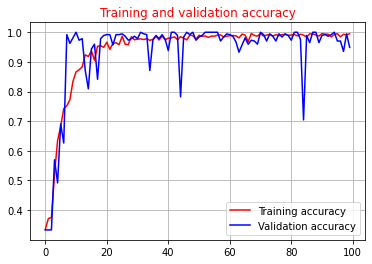

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(acc)), acc, 'r', label='Training accuracy')
plt.plot(range(len(acc)), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy', c='r')
plt.legend(loc=0)
plt.grid()
plt.show()